In [1]:
#importing libraries
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
data = pd.read_csv("C:/Users/ADS\Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(data.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [3]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
for col in data.columns:
  missing_rows = data.loc[data[col]==0].shape[0]
  print(col + ": "+ str(missing_rows))

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [5]:
data["Glucose"] = data["Glucose"].replace(0,np.nan)
data["BloodPressure"] = data["BloodPressure"].replace(0,np.nan)
data["SkinThickness"] = data["SkinThickness"].replace(0,np.nan)
data["Insulin"] = data["Insulin"].replace(0,np.nan)
data["BMI"] = data["BMI"].replace(0,np.nan)

In [6]:
data["Glucose"] = data["Glucose"].fillna(data["Glucose"].mean())
data["BloodPressure"] = data["BloodPressure"].fillna(data["BloodPressure"].mean())
data["SkinThickness"] = data["SkinThickness"].fillna(data["SkinThickness"].mean())
data["Insulin"] = data["Insulin"].fillna(data["Insulin"].mean())
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())

In [7]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
data_scaled = pd.DataFrame(data_scaled,columns = data.columns)

In [8]:
data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896


In [14]:
data_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,7.956598e-16,-3.330669e-16,3.515706e-16,2.451743e-16,1.931325e-16,7.401487e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,-8.363615e-03,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,6.029301e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [9]:
data_scaled["Outcome"] = data["Outcome"]
data = data_scaled

In [10]:
print(data.describe().loc[["mean","std","max"],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [11]:
X = data.loc[:,data.columns != "Outcome"]
y = data.loc[:,"Outcome"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [1]:
model = Sequential()
model.add(Dense(units=32, activation = 'relu', input_dim = 8))
model.add (Dense(units=16, activation = 'relu'))
model.add (Dense(units=1, activation = 'sigmoid'))
model.compile (optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

# building the artificial neural network rectifier 
model = Sequential()
model.add(Dense(units = 64, kernel_initializer="uniform",activation = "relu",input_dim = 17))
model.add(Dense(units = 16, kernel_initializer="uniform",activation = "relu"))
model.add(Dense(units= 1,kernel_initializer = "uniform",activation ="relu"))
model.compile(optimizer=Adam(lr=0.001),loss = "mse",metrics=["mean_absolute_error"])

NameError: name 'Sequential' is not defined

In [18]:
model.fit(X_train, y_train,epochs = 200)

Epoch 1/200
20/20 [==============================] - 2s 4ms/step - loss: 0.7455 - accuracy: 0.4479
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.6401
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.7134
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7459
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5098 - accuracy: 0.7606
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.7671
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4791 - accuracy: 0.7720
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4710 - accuracy: 0.7622
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7671
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7687
Epoch 11/

In [19]:
scores = model.evaluate (X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate (X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9186
Training Accuracy: 91.86%

5/5 [==============================] - 0s 6ms/step - loss: 0.6332 - accuracy: 0.7338
Testing Accuracy: 73.38%



5/5 [==============================] - 0s 4ms/step


Text(50.72222222222221, 0.5, 'Actual')

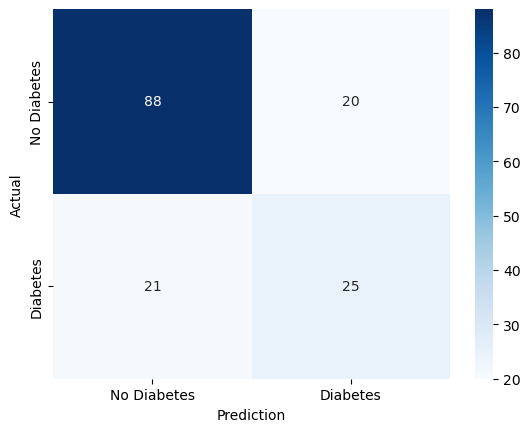

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use predict method to get predicted probabilities
y_test_pred_prob = model.predict(X_test)

# Apply a threshold (for example, 0.5) to get predicted classes
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Now you can proceed with the confusion matrix and visualization
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,
                 xticklabels=['No Diabetes', 'Diabetes'],
                 yticklabels=['No Diabetes', 'Diabetes'],
                 fmt='g', cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")